<a href="https://colab.research.google.com/github/Manoj-Kumar-Paliviri/Sentiment-Analysis/blob/main/ML_Major_Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Gathering and loading

In [ ]:
import numpy as np 
import pandas as pd
import sklearn
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data Sets/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

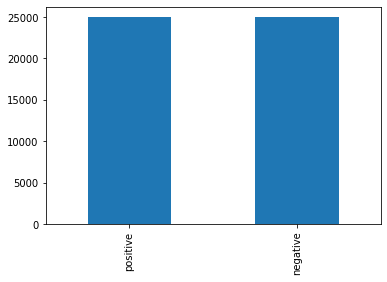

In [ ]:
df.sentiment.value_counts().plot(kind = 'bar')

In [ ]:
df.shape

(50000, 2)

#Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('all') 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
len(stop_words)

179

In [ ]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for word in negative_words:
  stop_words.remove(word)
len(stop_words)

160

Cleaning the data by removing numbers,punctuation and white spaces using 're'(regular expression) module

In [ ]:
import re
replace_white_space_re = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(data):
  data = str(data).lower()
  data = data.replace("<br /><br />", "")
  data = replace_white_space_re.sub(' ', data)
  data = re.sub("[^a-z]+", " ", data)
  data = re.sub("[0-9]", " ",data)
  data = data.split(" ")
  data = [word for word in data if word not in stop_words ]
  data = " ".join(data)
  return data

In [ ]:
df['review'] = df['review'].apply(clean_text)
df[['review','sentiment']].head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive
5,probably time favorite movie story selflessnes...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


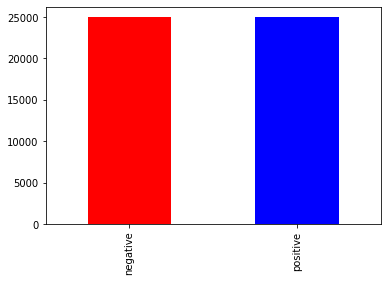

In [ ]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color = ['r','b','g'])

Stemming

In [ ]:
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
cleansed_review = []
for text in df['review']:
  cleansed_text = []
  text = text.replace('<br /><br />',' ')
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  for word in nltk.word_tokenize(text):
    if word not in stopwords.words('english'):
      cleansed_text.append(ps.stem(word))
  cleansed_text = ' '.join(word for word in cleansed_text)
  cleansed_review.append(cleansed_text)

In [ ]:
cleansed_review[6]

'sure would like see resurrect date seahunt seri tech today would bring back kid excit grew black white tv seahunt gunsmok hero everi week vote comeback new sea hunt need chang pace tv would work world water adventur oh way thank outlet like view mani viewpoint tv mani movi ole way believ got wan na say would nice read plu point sea hunt rhyme would line would let submit leav doubt quit must go let'

Setting the input and output

In [ ]:
x = np.array(cleansed_review)
y = df['sentiment'].values
print(x,y,sep = '\n')

['one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'
 'wond

Splitting the data to test and train the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x_train.shape)
print(y_test.shape)

(37500,)
(12500,)


In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['negative', 'positive'], dtype=object), array([18709, 18791]))

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect1',TfidfVectorizer()),('model1',SVC())])
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect1',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model1',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', 

In [ ]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [ ]:
x_train

<37500x62405 sparse matrix of type '<class 'numpy.float64'>'
	with 3477496 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<12500x62405 sparse matrix of type '<class 'numpy.float64'>'
	with 1157375 stored elements in Compressed Sparse Row format>

In [ ]:
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
y_test

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8932

In [ ]:
confusion_matrix(y_pred,y_test)

array([[5562,  606],
       [ 729, 5603]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      6168
    positive       0.90      0.88      0.89      6332

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



Evaluation for a specific message

In [ ]:
text = cleansed_review[6]
text

'sure would like see resurrect date seahunt seri tech today would bring back kid excit grew black white tv seahunt gunsmok hero everi week vote comeback new sea hunt need chang pace tv would work world water adventur oh way thank outlet like view mani viewpoint tv mani movi ole way believ got wan na say would nice read plu point sea hunt rhyme would line would let submit leav doubt quit must go let'

In [ ]:
df['sentiment'][6]

'positive'

In [ ]:
text = vect.transform([text])
model.predict(text)

array(['negative'], dtype=object)

Saving the model

In [ ]:
import joblib
joblib.dump(text_model,'Sentiment_Analyzer')

['Sentiment_Analyzer']

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 2.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 4.2MB 30.8MB/s 
     |████████████████████████████████| 174kB 42.4MB/s 
     |████████████████████████████████| 112kB 53.7MB/s 
     |████████████████████████████████| 122kB 30.8MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('Sentiment_Analyzer')
st.title('Sentiment Analyzer')
input = st.text_input('Enter your review:')
output = model.predict([input])
if st.button('Predict'):
  st.title(output[0])

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://e259f0d57f65.ngrok.io'

In [ ]:
import sys
sys.version

'3.7.11 (default, Jul  3 2021, 18:01:19) \n[GCC 7.5.0]'

In [ ]:
import sklearn
sklearn.__version__ 

'0.22.2.post1'

In [ ]:
import joblib
joblib.__version__ 

'1.0.1'